In [ ]:
!pip install google_play_scraper
!pip install textblob
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (15,10)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.0 MB/s eta 0:00:00


<ipython-input-1-9ccb641008d5>:31: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google_play_scraper import reviews_all
import pandas as pd

# Scrape all reviews for Strava app
strava_reviews = reviews_all(
    'com.strava',  # Strava app ID
    lang='id',     # Language code
    country='us'   # Country code
)

# Convert the reviews into a DataFrame
strava_reviews_df = pd.DataFrame(strava_reviews)


In [ ]:
# Select relevant columns
columns_to_display = ['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']

# Filter the DataFrame to show only these columns
strava_reviews_filtered = strava_reviews_df[columns_to_display]

# Show the first few rows
print(strava_reviews_filtered.head())

                                             content  score  thumbsUpCount  \
0                           Aplikasi yg sangat bagus      5              0   
1                     Belum support bahasa Indonesia      3              0   
2                                               Good      5              0   
3                                Sangat membantu min      4              0   
4  Strava Strava,map jaman kapan yg di pakai ini?...      1              0   

  reviewCreatedVersion                  at replyContent repliedAt  
0               376.10 2024-09-22 04:04:06         None      None  
1               376.10 2024-09-22 02:03:23         None      None  
2               376.10 2024-09-22 01:35:42         None      None  
3                 None 2024-09-22 00:28:45         None      None  
4               376.10 2024-09-21 17:12:41         None      None  


In [ ]:
# Show more rows
pd.set_option('display.max_rows', 50)  # Change the number based on how many rows you want to display
print(strava_reviews_filtered)

                                                content  score  thumbsUpCount  \
0                              Aplikasi yg sangat bagus      5              0   
1                        Belum support bahasa Indonesia      3              0   
2                                                  Good      5              0   
3                                   Sangat membantu min      4              0   
4     Strava Strava,map jaman kapan yg di pakai ini?...      1              0   
...                                                 ...    ...            ...   
4797                                          nice apps      5              0   
4798                                                 Pk      5              0   
4799  This free version app is more than enough for ...      4              0   
4800                                              Asyik      5              0   
4801                                           Bgus bgt      5              0   

     reviewCreatedVersion  

In [ ]:
strava_reviews_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c325e302-693d-4dec-b364-23f9e342e7c0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi yg sangat bagus,5,0,376.10,2024-09-22 04:04:06,None,None,376.10
1,86b241f8-9120-41a8-b84e-afd6bd025403,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Belum support bahasa Indonesia,3,0,376.10,2024-09-22 02:03:23,None,None,376.10
2,de9b1616-293c-43b0-95d9-d92f750dea36,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,0,376.10,2024-09-22 01:35:42,None,None,376.10
3,50c7cb91-8c2a-42b4-ab30-f1b11a8f7d71,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat membantu min,4,0,None,2024-09-22 00:28:45,None,None,None
4,7b9cabcf-6928-4140-8357-c367c3515114,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Strava Strava,map jaman kapan yg di pakai ini?...",1,0,376.10,2024-09-21 17:12:41,None,None,376.10
...,...,...,...,...,...,...,...,...,...,...,...
4797,d22feb7c-a333-4963-a040-92dc7b77e59a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,nice apps,5,0,3.5.0,2013-07-05 15:13:31,None,None,3.5.0
4798,6c234bce-c8f5-4189-a78b-0ea70b505ca2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pk,5,0,3.5.0,2013-07-01 09:29:37,None,None,3.5.0
4799,7aab281d-cc02-416d-9ea2-f7aff877fc29,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,This free version app is more than enough for ...,4,0,3.4.0,2013-06-12 05:17:19,None,None,3.4.0
4800,ad15b7d8-c073-4f6a-876d-6285eb31d9f2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Asyik,5,0,None,2012-10-14 13:41:47,None,None,None


In [ ]:
#Information on the table
strava_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              4802 non-null   object        
 1   userName              4802 non-null   object        
 2   userImage             4802 non-null   object        
 3   content               4801 non-null   object        
 4   score                 4802 non-null   int64         
 5   thumbsUpCount         4802 non-null   int64         
 6   reviewCreatedVersion  3871 non-null   object        
 7   at                    4802 non-null   datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            3871 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 412.8+ KB


In [ ]:
print(strava_reviews_df.reviewCreatedVersion.unique())
print(strava_reviews_df.reviewCreatedVersion.nunique())

['376.10' None '362.15' '372.12' '375.10' '363.10' '374.11' '373.10'
 '355.16' '371.10' '369.10' '366.9' '298.9' '368.10' '367.9' '365.10'
 '364.9' '360.13' '316.11' '341.8' '345.8' '359.19' '358.12' '323.8'
 '361.12' '349.8' '351.18' '335.10' '331.9' '346.8' '337.13' '353.16'
 '347.6' '348.7' '311.10' '307.8' '354.13' '337.12' '277.8' '350.11'
 '344.10' '349.7' '343.9' '330.9' '320.12' '342.8' '337.10' '329.10'
 '336.11' '328.8' '327.7' '321.10' '195.13' '315.7' '333.10' '314.8'
 '312.7' '334.12' '285.10' '332.10' '290.8' '326.8' '325.8' '233.10'
 '319.9' '313.10' '317.10' '310.7' '324.10' '322.8' '281.9' '265.10'
 '270.9' '318.8' '317.9' '321.9' '306.7' '262.10' '297.8' '282.9' '233.9'
 '197.9' '278.11' '267.9' '309.9' '294.10' '299.10' '308.9' '218.8'
 '304.10' '305.13' '301.9' '303.9' '302.9' '172.8' '300.9' '279.9'
 '76.0.0' '295.8' '296.11' '284.10' '289.8' '291.7' '292.7' '293.7'
 '266.9' '258.11' '276.8' '285.9' '283.9' '269.10' '280.7' '272.8' '275.7'
 '268.10' '271.9' '257.11

In [ ]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
strava_reviews_df.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Aplikasi yg sangat bagus,5,0,376.10,2024-09-22 04:04:06,None,None
1,Belum support bahasa Indonesia,3,0,376.10,2024-09-22 02:03:23,None,None
2,Good,5,0,376.10,2024-09-22 01:35:42,None,None
3,Sangat membantu min,4,0,None,2024-09-22 00:28:45,None,None
4,"Strava Strava,map jaman kapan yg di pakai ini?...",1,0,376.10,2024-09-21 17:12:41,None,None
...,...,...,...,...,...,...,...
4797,nice apps,5,0,3.5.0,2013-07-05 15:13:31,None,None
4798,Pk,5,0,3.5.0,2013-07-01 09:29:37,None,None
4799,This free version app is more than enough for ...,4,0,3.4.0,2013-06-12 05:17:19,None,None
4800,Asyik,5,0,None,2012-10-14 13:41:47,None,None


In [ ]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 12.2 MB/s eta 0:00:00


In [ ]:
file_path = 'strava_reviews_df.csv'

strava_reviews_df.to_csv(file_path, index =False)

In [ ]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
# Convert None values to empty strings in the 'content' column
strava_reviews_df['content'] = strava_reviews_df['content'].fillna('')
strava_reviews_df['sentiment_polarity'] = strava_reviews_df['content'].apply(lambda x: TextBlob(x).polarity)
strava_reviews_df['sentiment_subjective'] = strava_reviews_df['content'].apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
#df_nhsrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","at"]]
strava_reviews_df.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

,content,score,sentiment_polarity,sentiment_subjective
0,Aplikasi yg sangat bagus,5,0.000,0.000000
1,Belum support bahasa Indonesia,3,0.000,0.000000
2,Good,5,0.700,0.600000
3,Sangat membantu min,4,0.000,0.000000
4,"Strava Strava,map jaman kapan yg di pakai ini? map jaman kampung gw masi hutan",1,0.000,0.000000
...,...,...,...,...
4797,nice apps,5,0.600,1.000000
4798,Pk,5,0.000,0.000000
4799,"This free version app is more than enough for me to record my cycling activity, its accurate and informative.",4,0.325,0.608333
4800,Asyik,5,0.000,0.000000


In [ ]:
#Check number of reviews scores
strava_reviews_df['score'].value_counts()

,count
score,
5,3216
1,549
4,525
3,306
2,206


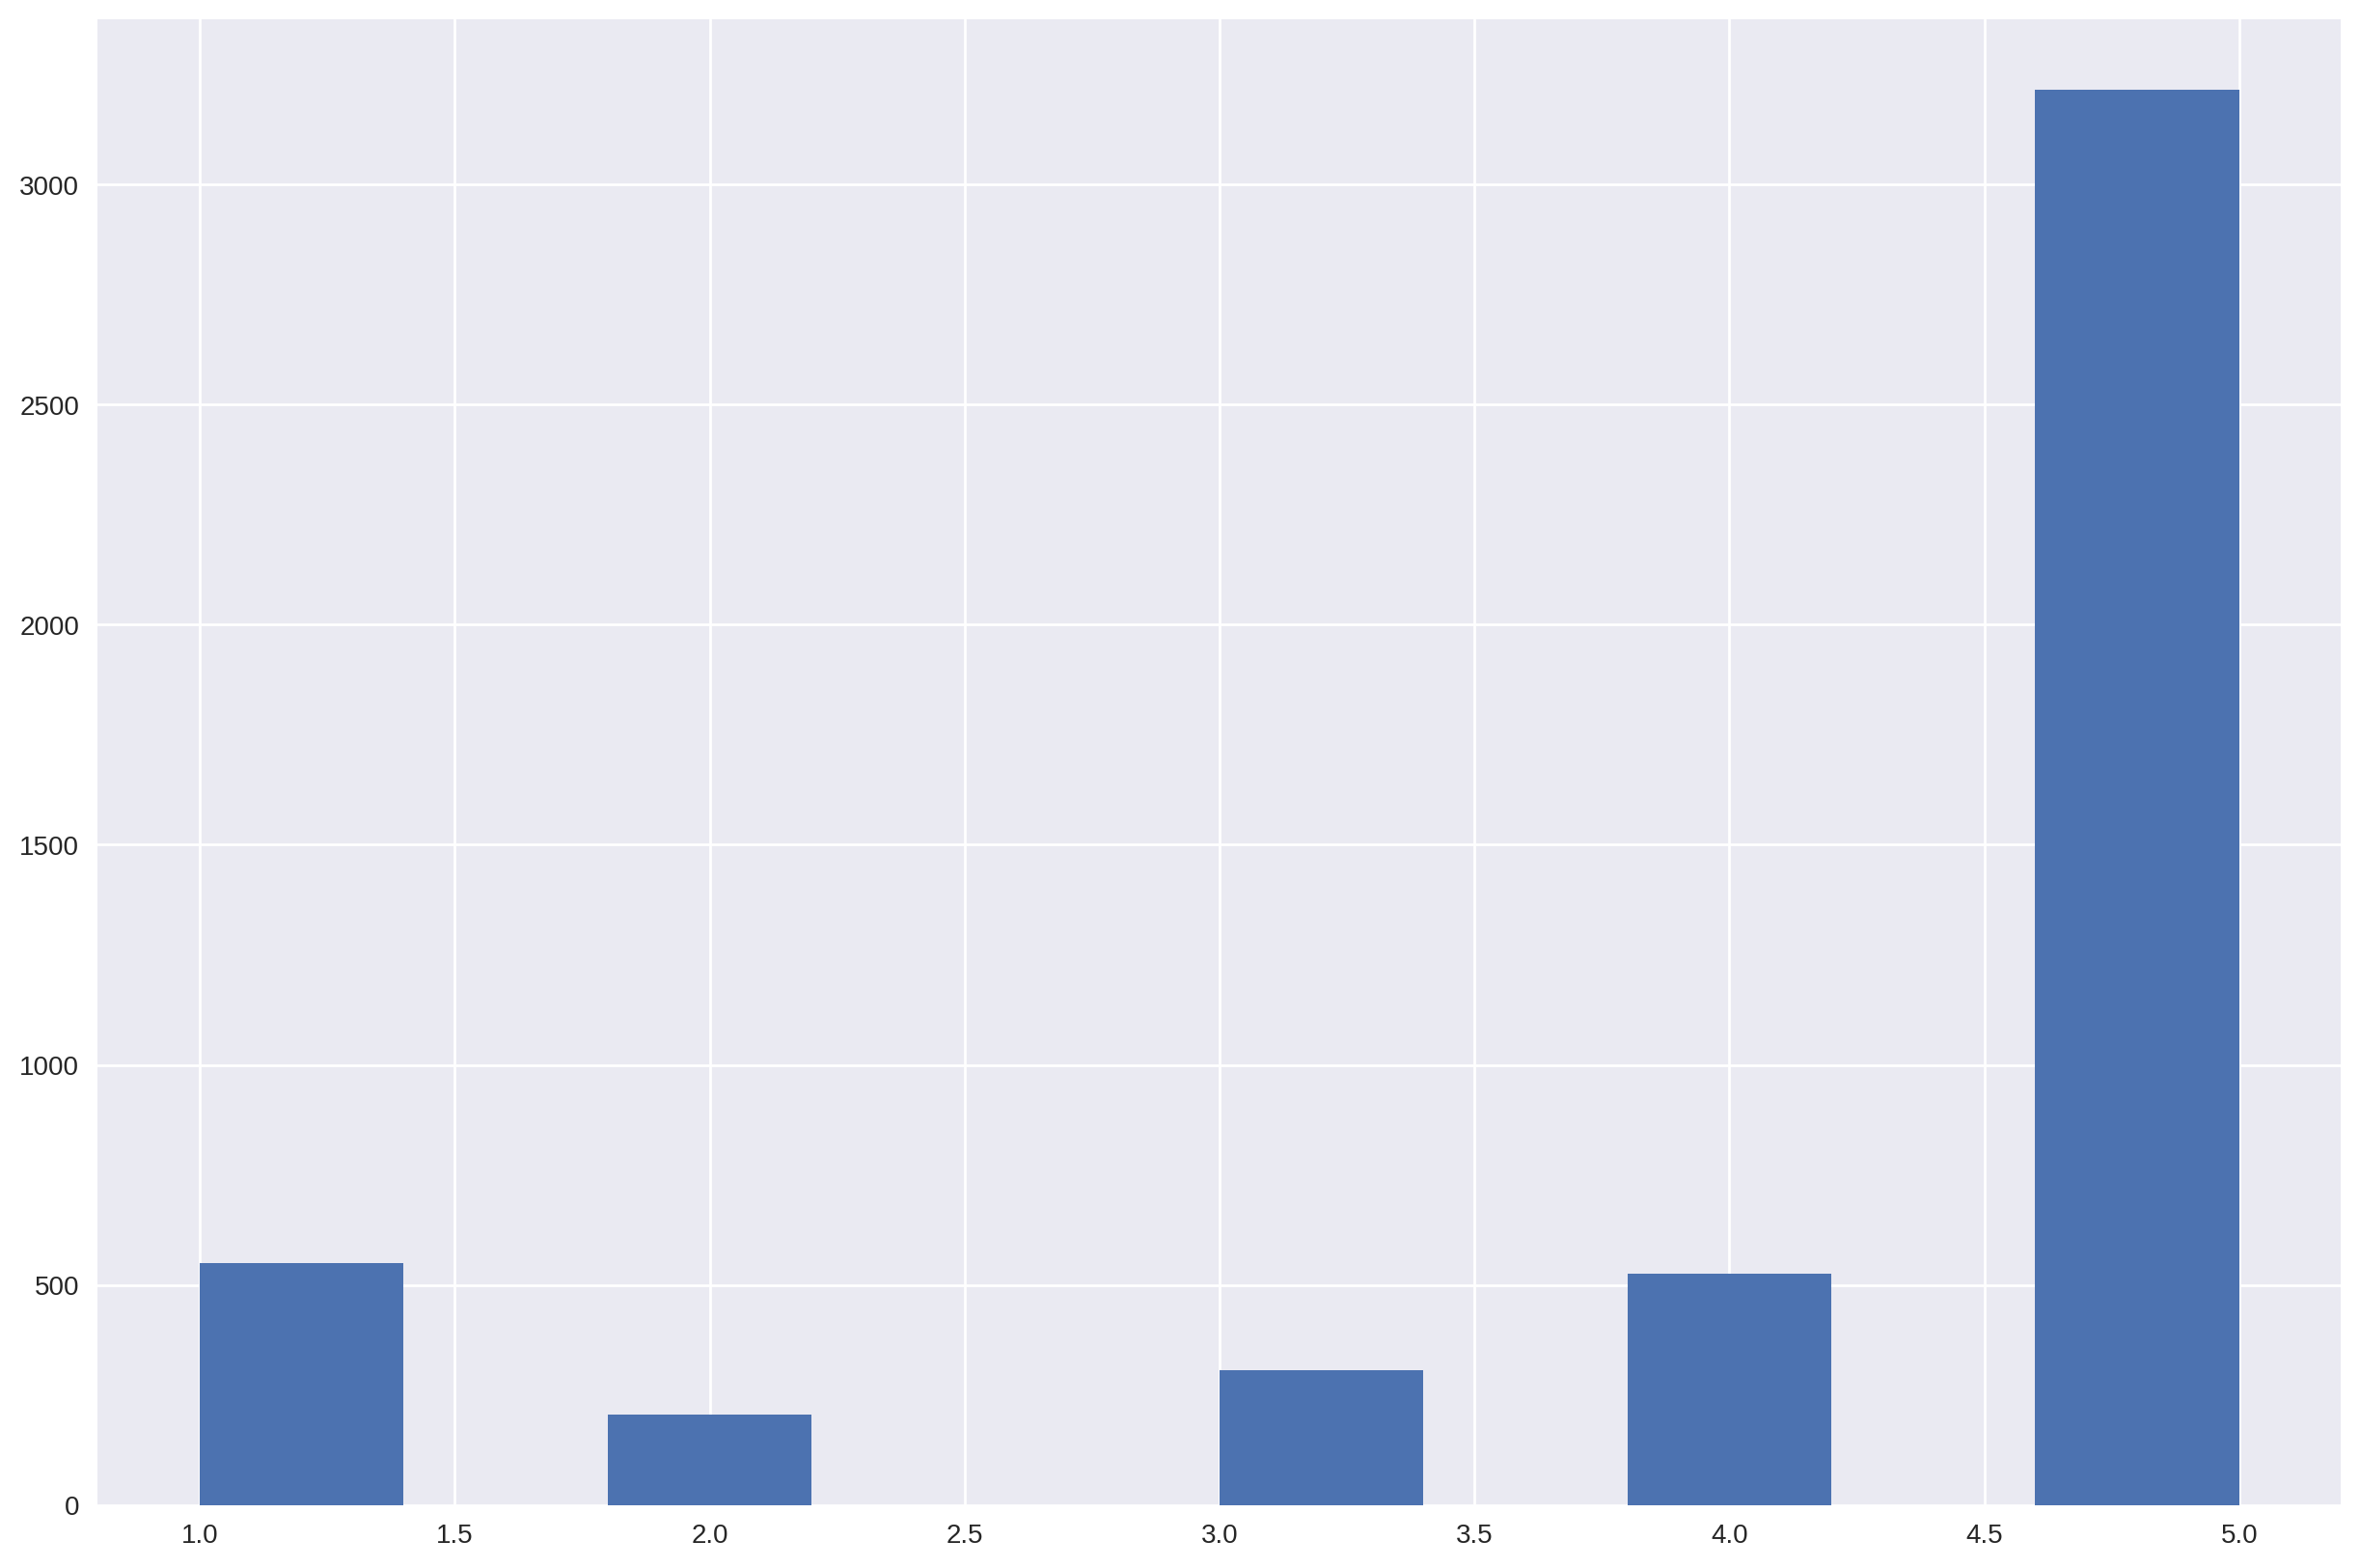

In [ ]:
plt.hist(strava_reviews_df['score'])
plt.show()

In [ ]:
strava_reviews_df['content'] = strava_reviews_df['content'].astype(str) # Before lowercasing
# Access a valid index within the DataFrame's range
print(strava_reviews_df['content'][100]) # Changed index to 100 (or any valid index within the range)

Kenapa tak bahasa Indonesia bos


In [ ]:
strava_reviews_df['content']= strava_reviews_df['content'].apply(lambda x: x.lower())
# Access a valid index within the DataFrame's range
print(strava_reviews_df['content'][100]) # Changed index to 100 (or any valid index within the range)

kenapa tak bahasa indonesia bos


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string

strava_reviews_df['wordCount'] = [len(review.split()) for review in strava_reviews_df['content']]

strava_reviews_df['uppercaseCharCount'] = [sum(char.isupper() for char in review) \
                              for review in strava_reviews_df['content']]

strava_reviews_df['specialCharCount'] = [sum(char in string.punctuation for char in review) \
                            for review in strava_reviews_df['content']]

In [ ]:
strava_reviews_df.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,aplikasi yg sangat bagus,5,0.000,0.000000,4,0,0
1,belum support bahasa indonesia,3,0.000,0.000000,4,0,0
2,good,5,0.700,0.600000,1,0,0
3,sangat membantu min,4,0.000,0.000000,3,0,0
4,"strava strava,map jaman kapan yg di pakai ini? map jaman kampung gw masi hutan",1,0.000,0.000000,14,0,2
...,...,...,...,...,...,...,...
4797,nice apps,5,0.600,1.000000,2,0,0
4798,pk,5,0.000,0.000000,1,0,0
4799,"this free version app is more than enough for me to record my cycling activity, its accurate and informative.",4,0.325,0.608333,19,0,2
4800,asyik,5,0.000,0.000000,1,0,0


In [ ]:
#Removing stopwords
#Using nltk
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from string import punctuation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

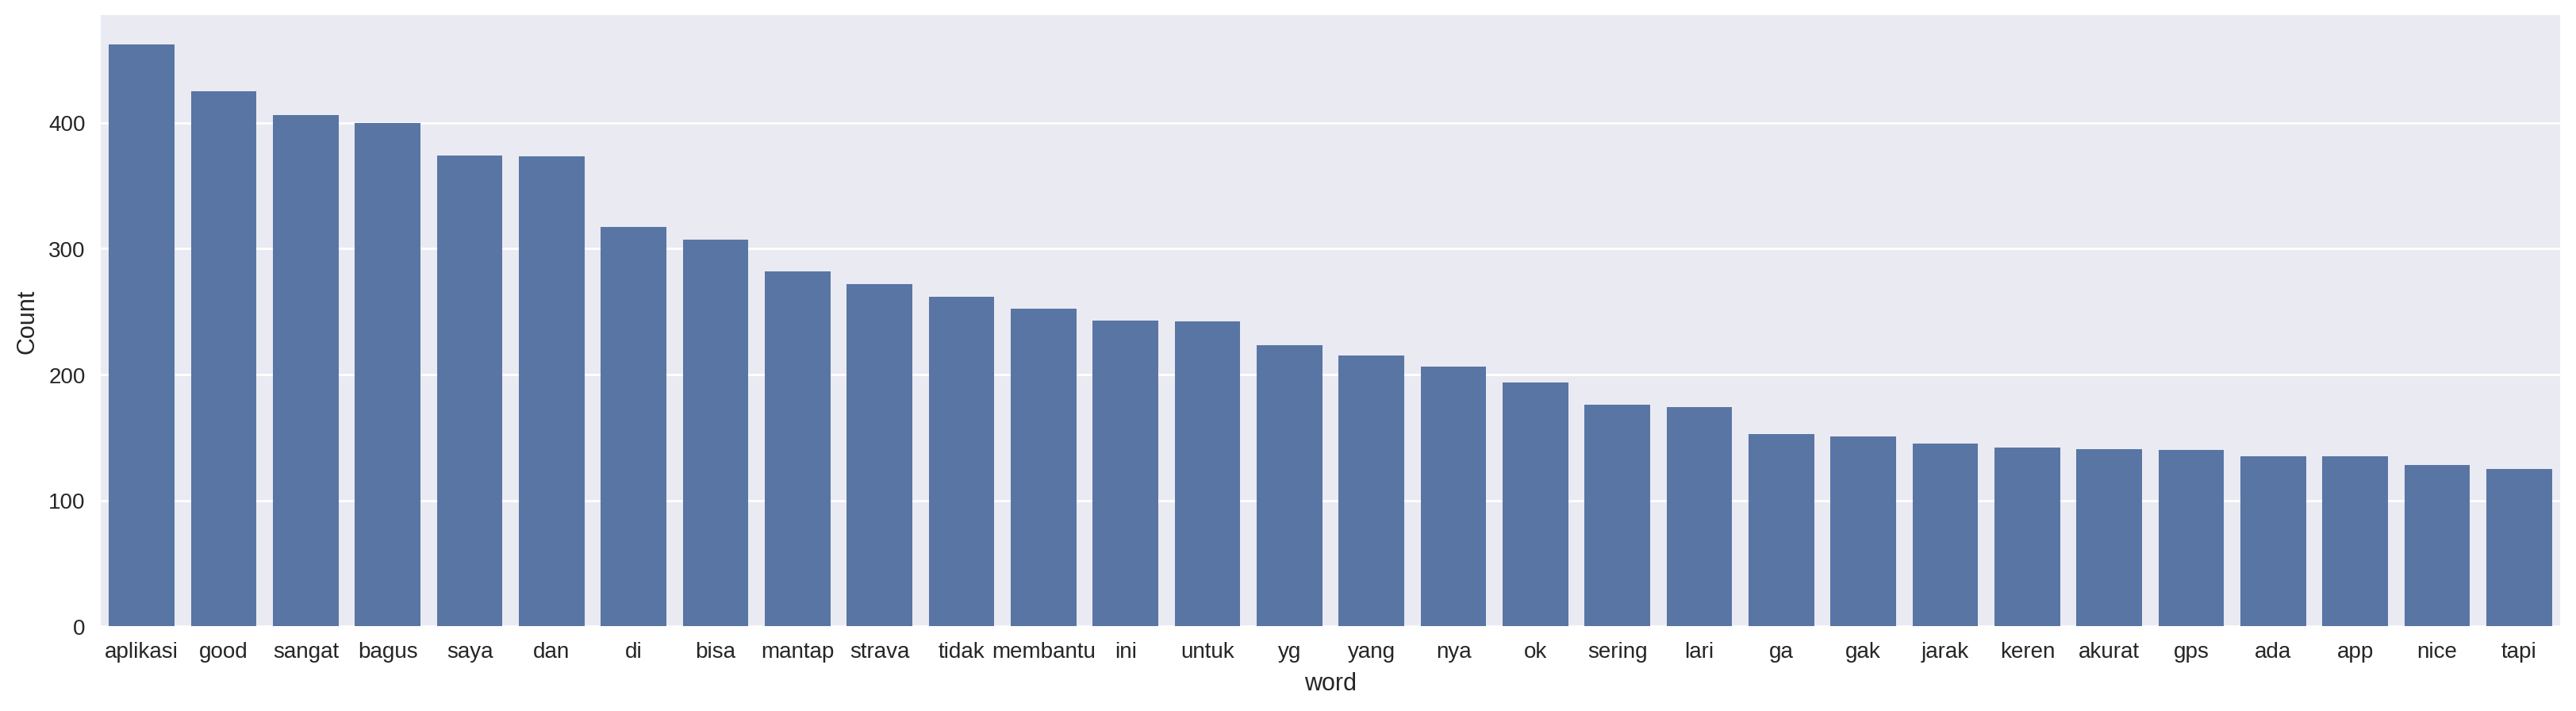

In [ ]:
freq_words(strava_reviews_df['content'])

In [ ]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(strava_reviews_df.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
    expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return expe.findall(s)
    return expe.sub(r'',s)

for y in strava_reviews_df['content']:
    #print(str(extract_emojis(y)))
    extracted_emojis.append(str(extract_emojis(y)))

print(extracted_emojis)

True
['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['👍', '👍', '👍', '👍', '👍']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['🇮', '🇩', '🚀', '👍']", '[]', '[]', "['🙏']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['👍']", '[]', '[]', '[]', '[]', "['👎']", "['🥲']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['👍']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😁']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['🥴']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['🔥', '🔥']", '[]', '[]', "['🙏']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['👍', '🏻']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '

In [ ]:
strava_reviews_df.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,aplikasi yg sangat bagus,5,0.000,0.000000,4,0,0
1,belum support bahasa indonesia,3,0.000,0.000000,4,0,0
2,good,5,0.700,0.600000,1,0,0
3,sangat membantu min,4,0.000,0.000000,3,0,0
4,"strava strava,map jaman kapan yg di pakai ini? map jaman kampung gw masi hutan",1,0.000,0.000000,14,0,2
...,...,...,...,...,...,...,...
4797,nice apps,5,0.600,1.000000,2,0,0
4798,pk,5,0.000,0.000000,1,0,0
4799,"this free version app is more than enough for me to record my cycling activity, its accurate and informative.",4,0.325,0.608333,19,0,2
4800,asyik,5,0.000,0.000000,1,0,0


In [ ]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
strava_reviews_df['sentiment_rating'] = strava_reviews_df['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [ ]:
strava_reviews_df.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,aplikasi yg sangat bagus,5,0.000,0.000000,Positive
1,belum support bahasa indonesia,3,0.000,0.000000,Neutral
2,good,5,0.700,0.600000,Positive
3,sangat membantu min,4,0.000,0.000000,Positive
4,"strava strava,map jaman kapan yg di pakai ini? map jaman kampung gw masi hutan",1,0.000,0.000000,Negative
...,...,...,...,...,...
4797,nice apps,5,0.600,1.000000,Positive
4798,pk,5,0.000,0.000000,Positive
4799,"this free version app is more than enough for me to record my cycling activity, its accurate and informative.",4,0.325,0.608333,Positive
4800,asyik,5,0.000,0.000000,Positive


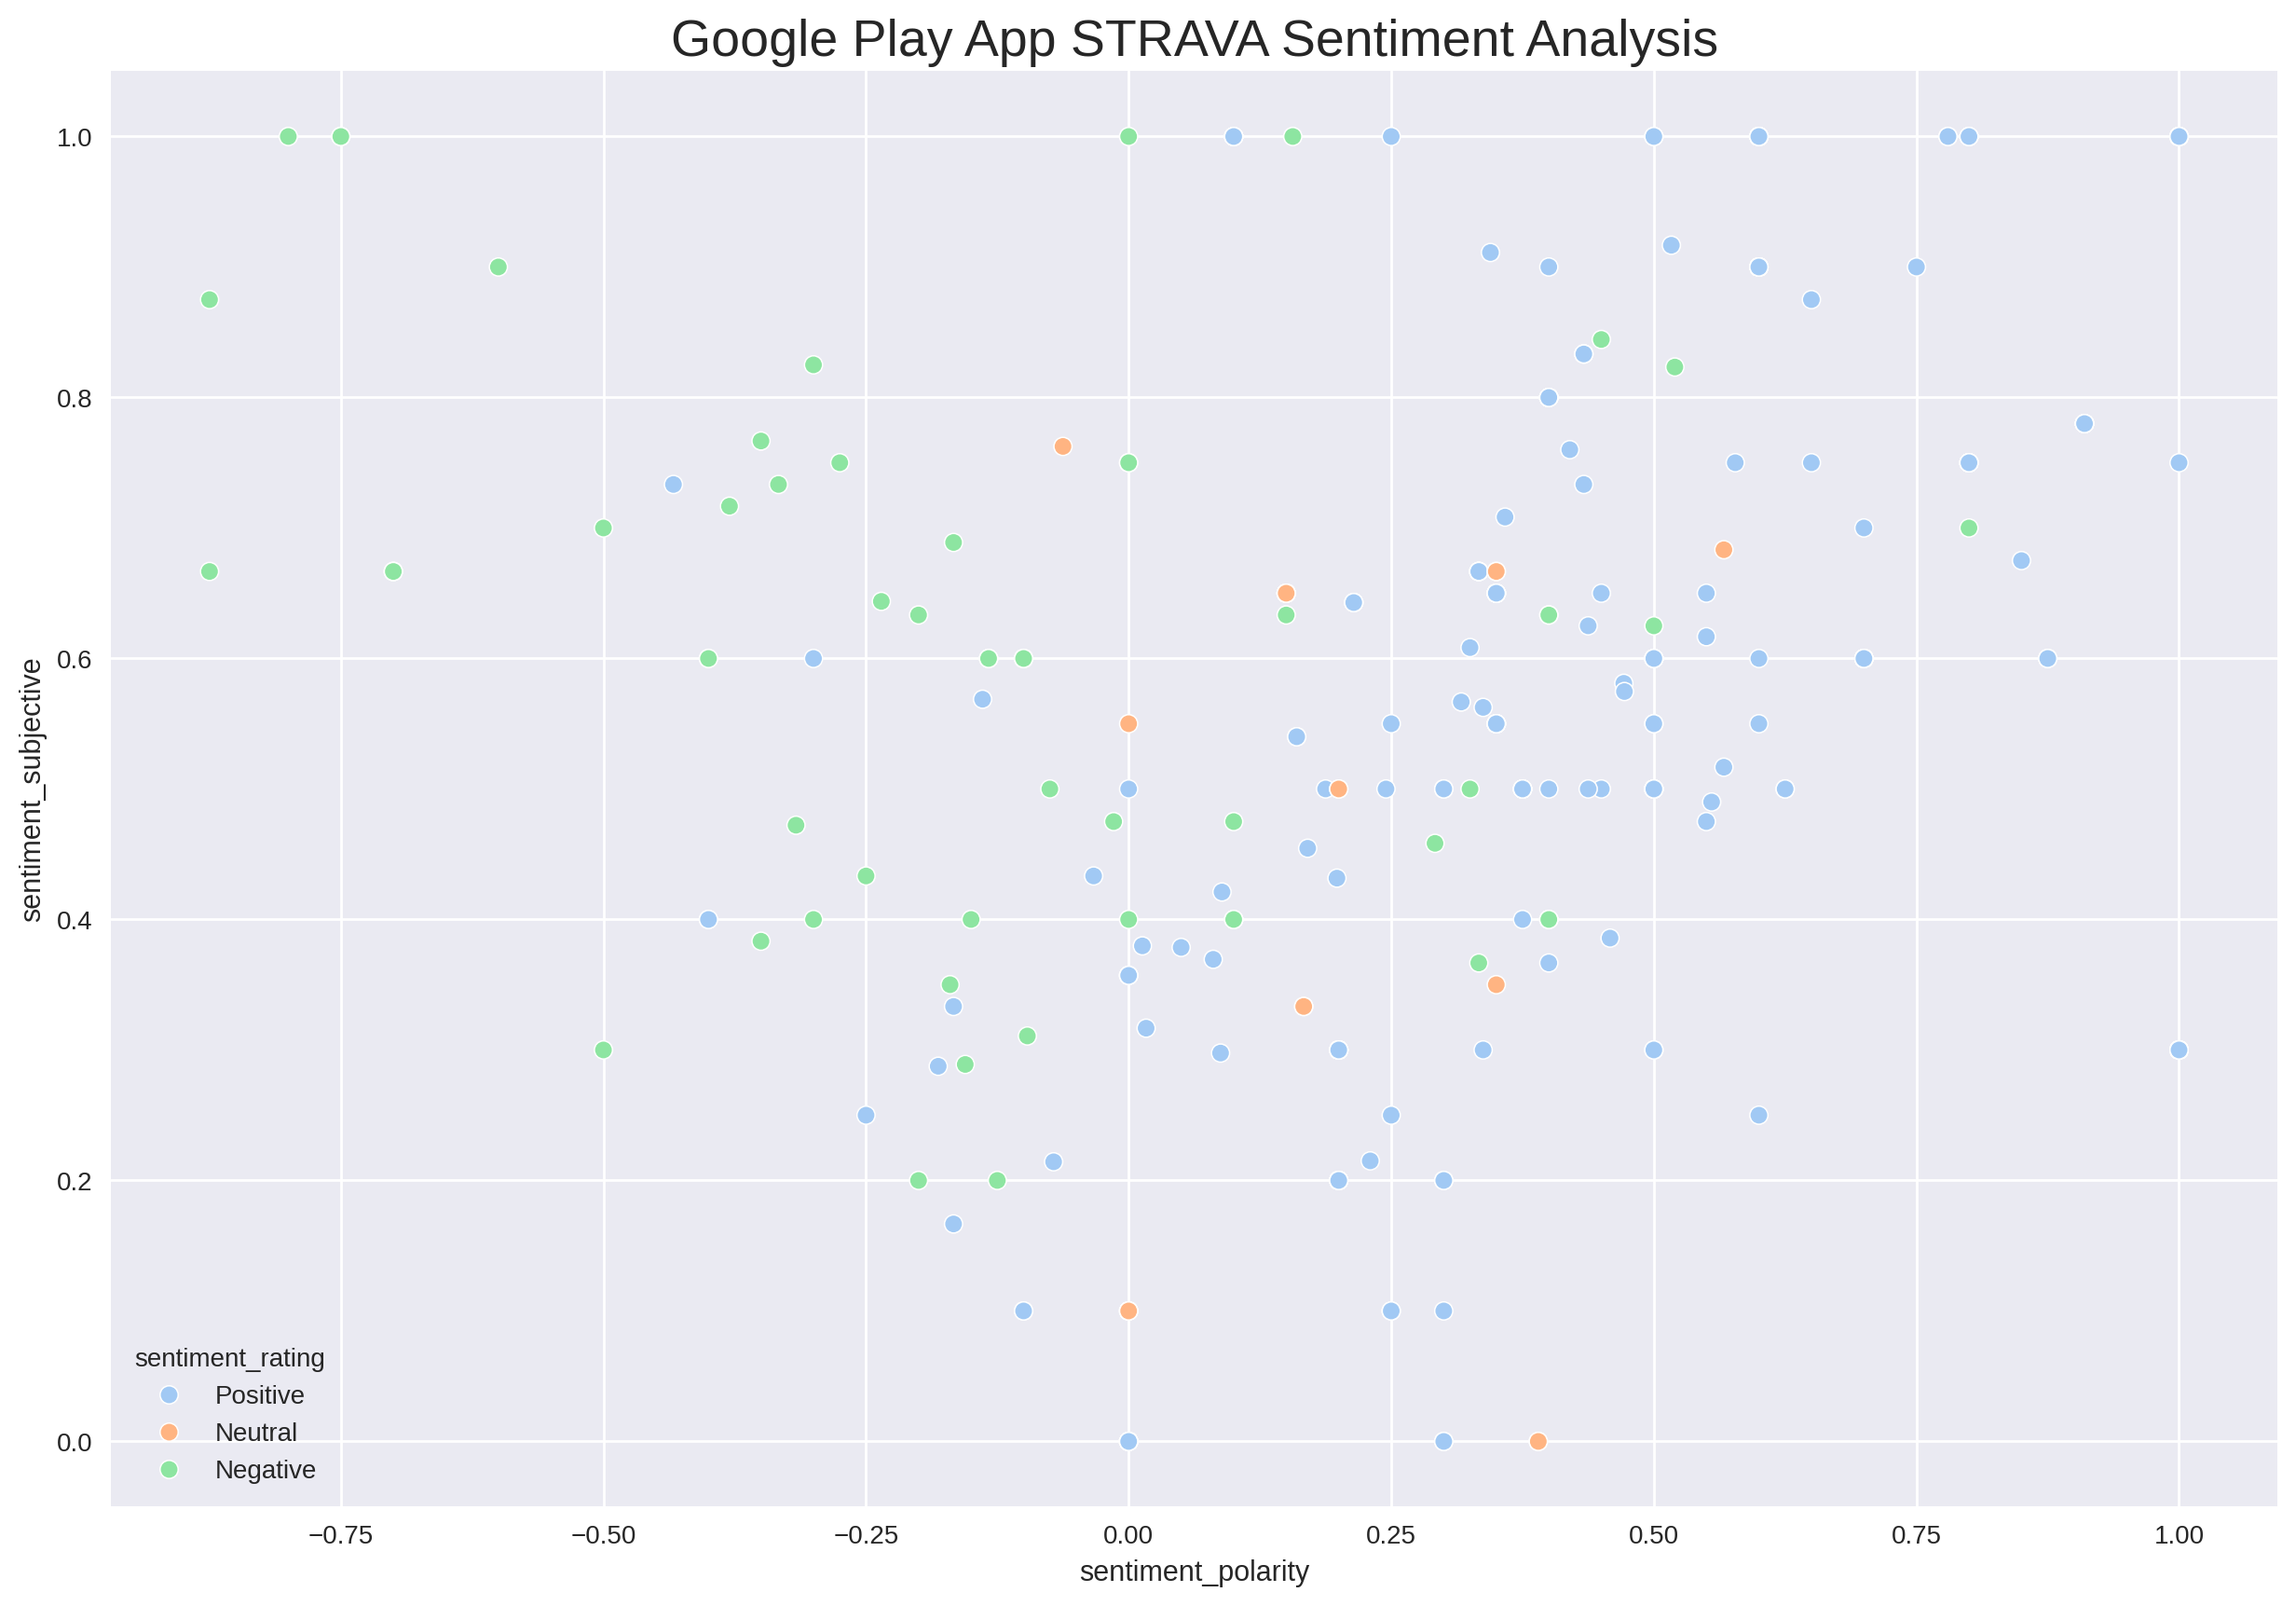

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Pass the DataFrame to the data argument.
# Specify x and y columns using keywords.
sns.scatterplot(data=strava_reviews_df, x='sentiment_polarity', y='sentiment_subjective',
                hue = strava_reviews_df['sentiment_rating'], edgecolor='white', palette="pastel")

plt.title("Google Play App STRAVA Sentiment Analysis", fontsize=20)
plt.show()



In [ ]:
strava_reviews_df_stopwords = strava_reviews_df.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

In [ ]:
import requests

# Unduh daftar stopwords dari URL
url = 'https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt'
response = requests.get(url)

# Simpan daftar stopwords ke file lokal
with open('id_stopwords.txt', 'w') as file:
    file.write(response.text)

# Baca stopwords dari file
with open('id_stopwords.txt', 'r') as file:
    stopwords_id = file.read().splitlines()

# Menampilkan beberapa stopwords
print(f"Terdapat total {len(stopwords_id)} kata stopwords dalam bahasa Indonesia:")
print(stopwords_id[:10])  # Menampilkan 10 kata pertama dari daftar stopwords


Terdapat total 758 kata stopwords dalam bahasa Indonesia:
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir']


In [ ]:
# Fungsi untuk menghapus stopwords dari teks
def remove_stopwords(text, stopwords_list):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_list]
    return ' '.join(filtered_words)

In [ ]:
# Create the 'review_without_stopwords' column and initialize it with the 'content' column
strava_reviews_df_stopwords['review_without_stopwords'] = strava_reviews_df_stopwords['content']

# Now you can remove stopwords from the 'review_without_stopwords' column
strava_reviews_df_stopwords['review_without_stopwords'] = strava_reviews_df_stopwords['review_without_stopwords'].apply(
    lambda x: remove_stopwords(x, stopwords_id)
)

# Display the result
strava_reviews_df_stopwords


,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating,review_without_stopwords
0,aplikasi yg sangat bagus,5,0.000,0.000000,Positive,aplikasi yg bagus
1,belum support bahasa indonesia,3,0.000,0.000000,Neutral,support bahasa indonesia
2,good,5,0.700,0.600000,Positive,good
3,sangat membantu min,4,0.000,0.000000,Positive,membantu min
4,"strava strava,map jaman kapan yg di pakai ini? map jaman kampung gw masi hutan",1,0.000,0.000000,Negative,"strava strava,map jaman yg pakai ini? map jaman kampung gw masi hutan"
...,...,...,...,...,...,...
4797,nice apps,5,0.600,1.000000,Positive,nice apps
4798,pk,5,0.000,0.000000,Positive,pk
4799,"this free version app is more than enough for me to record my cycling activity, its accurate and informative.",4,0.325,0.608333,Positive,"this free version app is more than enough for me to record my cycling activity, its accurate and informative."
4800,asyik,5,0.000,0.000000,Positive,asyik


In [ ]:
import string

strava_reviews_df_stopwords['wordCount'] = [len(review.split()) for review in strava_reviews_df_stopwords['content']]
strava_reviews_df_stopwords['wordCount_after_stopwords'] = [len(review.split()) for review in strava_reviews_df_stopwords['review_without_stopwords']]

In [ ]:
strava_reviews_df_stopwords.loc[:,["content","score","sentiment_polarity", "sentiment_rating","wordCount","review_without_stopwords", "wordCount_after_stopwords"]]

,content,score,sentiment_polarity,sentiment_rating,wordCount,review_without_stopwords,wordCount_after_stopwords
0,aplikasi yg sangat bagus,5,0.000,Positive,4,aplikasi yg bagus,3
1,belum support bahasa indonesia,3,0.000,Neutral,4,support bahasa indonesia,3
2,good,5,0.700,Positive,1,good,1
3,sangat membantu min,4,0.000,Positive,3,membantu min,2
4,"strava strava,map jaman kapan yg di pakai ini? map jaman kampung gw masi hutan",1,0.000,Negative,14,"strava strava,map jaman yg pakai ini? map jaman kampung gw masi hutan",12
...,...,...,...,...,...,...,...
4797,nice apps,5,0.600,Positive,2,nice apps,2
4798,pk,5,0.000,Positive,1,pk,1
4799,"this free version app is more than enough for me to record my cycling activity, its accurate and informative.",4,0.325,Positive,19,"this free version app is more than enough for me to record my cycling activity, its accurate and informative.",19
4800,asyik,5,0.000,Positive,1,asyik,1


In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

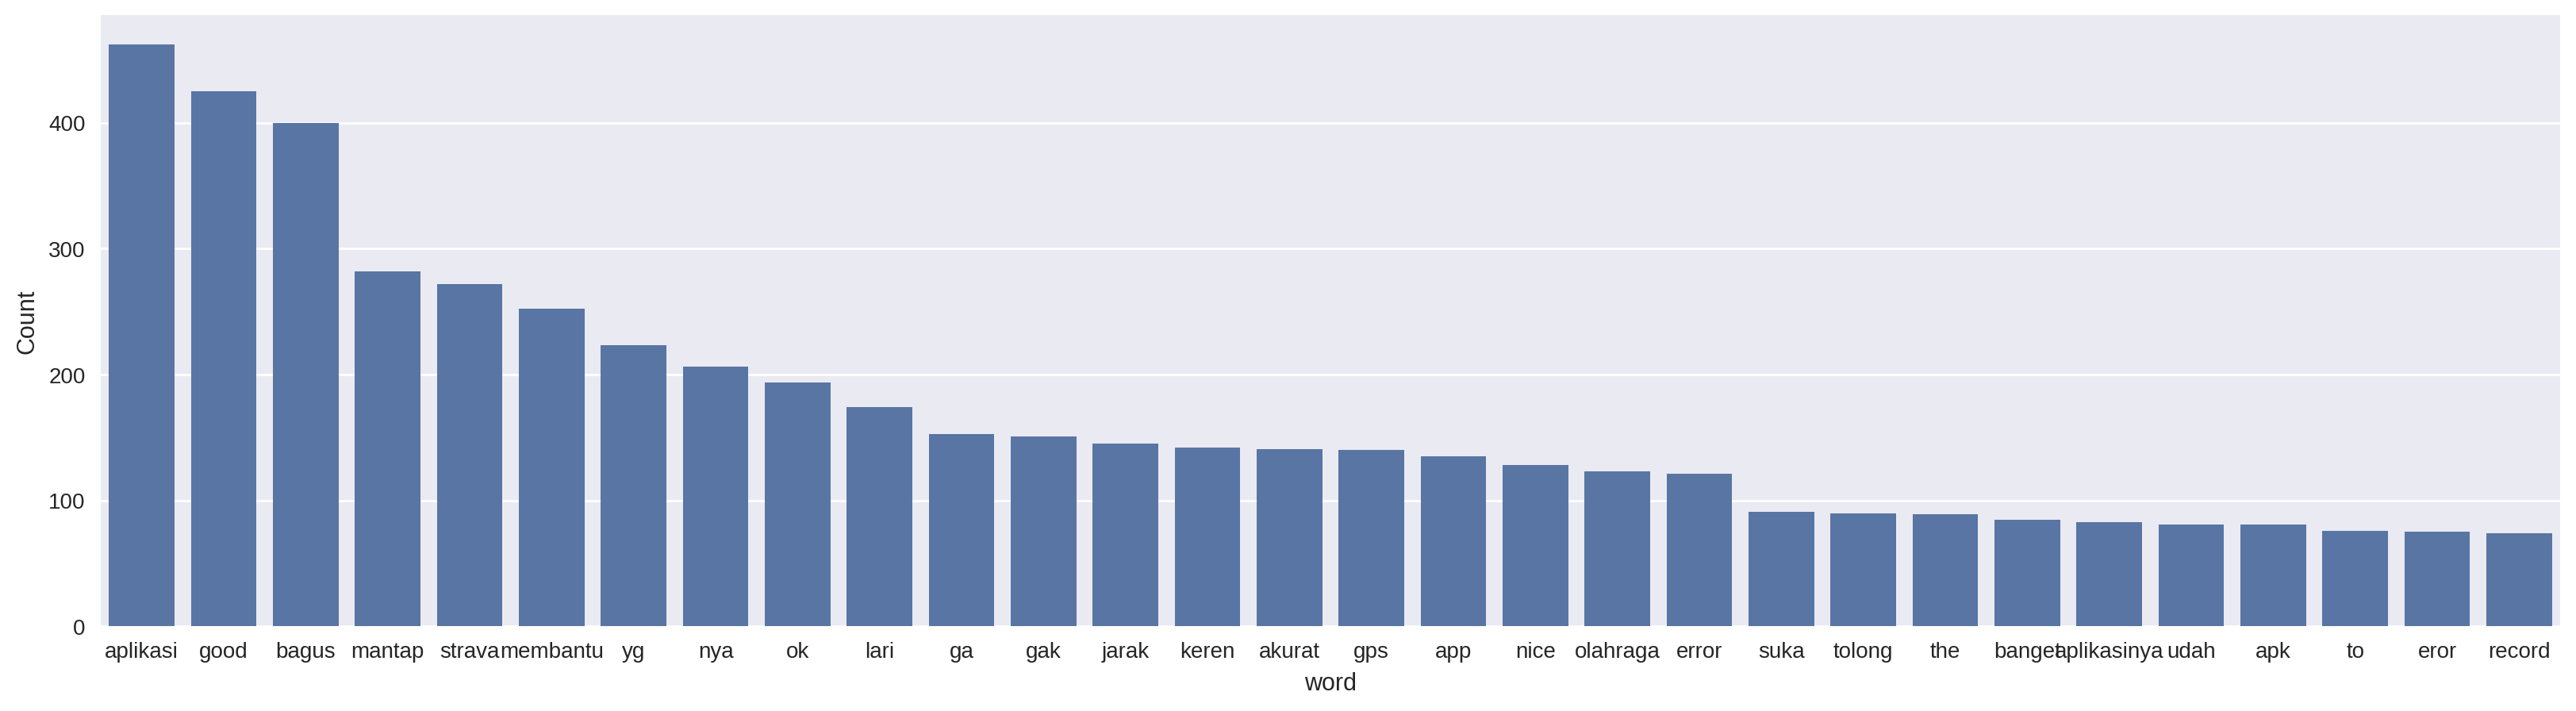

In [ ]:
freq_words(strava_reviews_df_stopwords['review_without_stopwords'])

In [ ]:
#Stemming

#Stemming function chops off the end of the word
#and transform the word into its root form.
#All suffixes like -s, -es, -ed, -ing are removed.

def stemming(x):
    st = PorterStemmer()
    if x is not None:
       for word in x.split():
           st.stem(word)

strava_reviews_df_stopwords['review_without_stopwords'].apply(lambda x:stemming(x))
print(strava_reviews_df_stopwords['review_without_stopwords'][4000])

ok


In [ ]:
#DROP NA
strava_reviews_df_stopwords.dropna(inplace=True)
strava_reviews_df_stopwords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   content                    4802 non-null   object 
 1   score                      4802 non-null   int64  
 2   sentiment_polarity         4802 non-null   float64
 3   sentiment_subjective       4802 non-null   float64
 4   sentiment_rating           4802 non-null   object 
 5   review_without_stopwords   4802 non-null   object 
 6   wordCount                  4802 non-null   int64  
 7   wordCount_after_stopwords  4802 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 300.2+ KB


In [ ]:
strava_reviews_df_stopwords.loc[:,["content","score","sentiment_rating","wordCount","review_without_stopwords", "wordCount_after_stopwords"]]

,content,score,sentiment_rating,wordCount,review_without_stopwords,wordCount_after_stopwords
0,aplikasi yg sangat bagus,5,Positive,4,aplikasi yg bagus,3
1,belum support bahasa indonesia,3,Neutral,4,support bahasa indonesia,3
2,good,5,Positive,1,good,1
3,sangat membantu min,4,Positive,3,membantu min,2
4,"strava strava,map jaman kapan yg di pakai ini? map jaman kampung gw masi hutan",1,Negative,14,"strava strava,map jaman yg pakai ini? map jaman kampung gw masi hutan",12
...,...,...,...,...,...,...
4797,nice apps,5,Positive,2,nice apps,2
4798,pk,5,Positive,1,pk,1
4799,"this free version app is more than enough for me to record my cycling activity, its accurate and informative.",4,Positive,19,"this free version app is more than enough for me to record my cycling activity, its accurate and informative.",19
4800,asyik,5,Positive,1,asyik,1


In [ ]:
file_path = 'strava_reviews_df_after_stopwords_stemming.csv'
strava_reviews_df_stopwords.to_csv(file_path, index=False)